In [1]:
ColabNotebook = 'google.colab' in str(get_ipython())

if ColabNotebook:
    # monta G-drive en entorno COLAB
    from google.colab import drive
    drive.mount('/content/drive/')

    # carpeta donde se encuentran archivos .py auxiliares
    FUENTES_DIR = '/content/drive/MyDrive/Colab Notebooks/FUENTES/'
    DATOS_DIR = '/content/drive/MyDrive/Colab Notebooks/DATOS/'      # carpeta donde se encuentran los datasets
else:
    # configuración para notebook con instalación LOCAL
    FUENTES_DIR = '../Fuentes'         # carpeta donde se encuentran archivos .py auxiliares
    DATOS_DIR   = '../Datos/' # carpeta donde se encuentran los datasets

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

In [2]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.utils import to_categorical

import numpy as np
from sklearn import preprocessing, metrics, model_selection 
import pandas as pd

In [3]:
df = pd.read_csv(DATOS_DIR + 'Iris.csv')

# Tomamos todas las columnas menos la última
X = np.array(df.iloc[:, 0:-1])
T = np.array(df.iloc[:,-1])

# Binarizador para convertir el nombre de la clase en one hot encoding
binarizer = preprocessing.LabelBinarizer()

# Binariza cada clase como una combinación de un 1 y 0s
T = binarizer.fit_transform(T)

print('Clases :', binarizer.classes_)


Clases : ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [4]:
#--- CONJUNTOS DE ENTRENAMIENTO Y TESTEO ---
X_train, X_test, T_train, T_test = model_selection.train_test_split( \
        X, T, test_size=0.30) #, random_state=42)

#Y_trainB = to_categorical(Y_train)

In [5]:
normalizarEntrada = 1  # 1 si normaliza; 0 si no

if normalizarEntrada:
    # Escala los valores entre 0 y 1
    min_max_scaler = preprocessing.MinMaxScaler()
    X_train = min_max_scaler.fit_transform(X_train)
    X_test = min_max_scaler.transform(X_test)

### Definición del modelo

In [6]:

# Crear un modelo de capas secuenciales
model=Sequential()

# Agregar las capas al modelo
model.add(Dense(2, input_shape=[4], activation='tanh'))
model.add(Dense(3, activation='softmax'))

# Imprimir un resumen del modelo
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 10        
                                                                 
 dense_1 (Dense)             (None, 3)                 9         
                                                                 
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Configuración para entrenamiento
#model.compile(optimizer='sgd', loss='mse', metrics=['accuracy'])

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])


In [8]:
# Entrena el modelo y guarda la historia del progreso
history = model.fit(x=X_train, y=T_train, batch_size=20, validation_split=0.25, epochs=500)

Epoch 1/500
4/4 [==============================] - 1s 93ms/step - loss: 1.1218 - accuracy: 0.6667 - val_loss: 1.0520 - val_accuracy: 0.7407
Epoch 2/500
4/4 [==============================] - 0s 6ms/step - loss: 1.1176 - accuracy: 0.6795 - val_loss: 1.0527 - val_accuracy: 0.7407
Epoch 3/500
4/4 [==============================] - 0s 9ms/step - loss: 1.1142 - accuracy: 0.6795 - val_loss: 1.0536 - val_accuracy: 0.7407
Epoch 4/500
4/4 [==============================] - 0s 11ms/step - loss: 1.1110 - accuracy: 0.6795 - val_loss: 1.0545 - val_accuracy: 0.7407
Epoch 5/500
4/4 [==============================] - 0s 9ms/step - loss: 1.1079 - accuracy: 0.6795 - val_loss: 1.0554 - val_accuracy: 0.7407
Epoch 6/500
4/4 [==============================] - 0s 10ms/step - loss: 1.1052 - accuracy: 0.6795 - val_loss: 1.0565 - val_accuracy: 0.7407
Epoch 7/500
4/4 [==============================] - 0s 9ms/step - loss: 1.1026 - accuracy: 0.6795 - val_loss: 1.0576 - val_accuracy: 0.7407
Epoch 8/500
4/4 [=======

4/4 [==============================] - 0s 9ms/step - loss: 1.0578 - accuracy: 0.4231 - val_loss: 1.0879 - val_accuracy: 0.2963
Epoch 60/500
4/4 [==============================] - 0s 4ms/step - loss: 1.0574 - accuracy: 0.4231 - val_loss: 1.0879 - val_accuracy: 0.2963
Epoch 61/500
4/4 [==============================] - 0s 8ms/step - loss: 1.0571 - accuracy: 0.4231 - val_loss: 1.0877 - val_accuracy: 0.2963
Epoch 62/500
4/4 [==============================] - 0s 8ms/step - loss: 1.0564 - accuracy: 0.4359 - val_loss: 1.0878 - val_accuracy: 0.2963
Epoch 63/500
4/4 [==============================] - 0s 8ms/step - loss: 1.0560 - accuracy: 0.4231 - val_loss: 1.0876 - val_accuracy: 0.2963
Epoch 64/500
4/4 [==============================] - 0s 10ms/step - loss: 1.0557 - accuracy: 0.4231 - val_loss: 1.0875 - val_accuracy: 0.2963
Epoch 65/500
4/4 [==============================] - 0s 5ms/step - loss: 1.0556 - accuracy: 0.4231 - val_loss: 1.0877 - val_accuracy: 0.2963
Epoch 66/500
4/4 [==============

4/4 [==============================] - 0s 9ms/step - loss: 1.0296 - accuracy: 0.4487 - val_loss: 1.0678 - val_accuracy: 0.3333
Epoch 118/500
4/4 [==============================] - 0s 9ms/step - loss: 1.0290 - accuracy: 0.4487 - val_loss: 1.0672 - val_accuracy: 0.3333
Epoch 119/500
4/4 [==============================] - 0s 5ms/step - loss: 1.0286 - accuracy: 0.4487 - val_loss: 1.0665 - val_accuracy: 0.3333
Epoch 120/500
4/4 [==============================] - 0s 8ms/step - loss: 1.0278 - accuracy: 0.4487 - val_loss: 1.0659 - val_accuracy: 0.3333
Epoch 121/500
4/4 [==============================] - 0s 9ms/step - loss: 1.0272 - accuracy: 0.4487 - val_loss: 1.0653 - val_accuracy: 0.3333
Epoch 122/500
4/4 [==============================] - 0s 8ms/step - loss: 1.0267 - accuracy: 0.4487 - val_loss: 1.0646 - val_accuracy: 0.3333
Epoch 123/500
4/4 [==============================] - 0s 10ms/step - loss: 1.0259 - accuracy: 0.4487 - val_loss: 1.0639 - val_accuracy: 0.3333
Epoch 124/500
4/4 [=======

Epoch 175/500
4/4 [==============================] - 0s 5ms/step - loss: 0.9835 - accuracy: 0.4872 - val_loss: 1.0191 - val_accuracy: 0.4074
Epoch 176/500
4/4 [==============================] - 0s 6ms/step - loss: 0.9824 - accuracy: 0.4744 - val_loss: 1.0178 - val_accuracy: 0.4074
Epoch 177/500
4/4 [==============================] - 0s 5ms/step - loss: 0.9812 - accuracy: 0.4872 - val_loss: 1.0166 - val_accuracy: 0.4074
Epoch 178/500
4/4 [==============================] - 0s 22ms/step - loss: 0.9799 - accuracy: 0.4872 - val_loss: 1.0155 - val_accuracy: 0.4074
Epoch 179/500
4/4 [==============================] - 0s 14ms/step - loss: 0.9789 - accuracy: 0.4872 - val_loss: 1.0144 - val_accuracy: 0.4074
Epoch 180/500
4/4 [==============================] - 0s 12ms/step - loss: 0.9776 - accuracy: 0.4872 - val_loss: 1.0133 - val_accuracy: 0.4074
Epoch 181/500
4/4 [==============================] - 0s 11ms/step - loss: 0.9770 - accuracy: 0.4872 - val_loss: 1.0123 - val_accuracy: 0.4074
Epoch 182

Epoch 233/500
4/4 [==============================] - 0s 8ms/step - loss: 0.8989 - accuracy: 0.6538 - val_loss: 0.9367 - val_accuracy: 0.6667
Epoch 234/500
4/4 [==============================] - 0s 6ms/step - loss: 0.8972 - accuracy: 0.6410 - val_loss: 0.9349 - val_accuracy: 0.6667
Epoch 235/500
4/4 [==============================] - 0s 9ms/step - loss: 0.8953 - accuracy: 0.6410 - val_loss: 0.9334 - val_accuracy: 0.6667
Epoch 236/500
4/4 [==============================] - 0s 7ms/step - loss: 0.8931 - accuracy: 0.6410 - val_loss: 0.9316 - val_accuracy: 0.6667
Epoch 237/500
4/4 [==============================] - 0s 11ms/step - loss: 0.8911 - accuracy: 0.6410 - val_loss: 0.9299 - val_accuracy: 0.6667
Epoch 238/500
4/4 [==============================] - 0s 11ms/step - loss: 0.8894 - accuracy: 0.6282 - val_loss: 0.9283 - val_accuracy: 0.6667
Epoch 239/500
4/4 [==============================] - 0s 8ms/step - loss: 0.8875 - accuracy: 0.6410 - val_loss: 0.9264 - val_accuracy: 0.6667
Epoch 240/5

Epoch 291/500
4/4 [==============================] - 0s 8ms/step - loss: 0.7718 - accuracy: 0.6154 - val_loss: 0.8258 - val_accuracy: 0.5556
Epoch 292/500
4/4 [==============================] - 0s 9ms/step - loss: 0.7695 - accuracy: 0.6154 - val_loss: 0.8237 - val_accuracy: 0.5556
Epoch 293/500
4/4 [==============================] - 0s 10ms/step - loss: 0.7673 - accuracy: 0.6154 - val_loss: 0.8218 - val_accuracy: 0.5556
Epoch 294/500
4/4 [==============================] - 0s 9ms/step - loss: 0.7647 - accuracy: 0.6154 - val_loss: 0.8197 - val_accuracy: 0.5556
Epoch 295/500
4/4 [==============================] - 0s 9ms/step - loss: 0.7624 - accuracy: 0.6282 - val_loss: 0.8177 - val_accuracy: 0.5556
Epoch 296/500
4/4 [==============================] - 0s 10ms/step - loss: 0.7605 - accuracy: 0.6282 - val_loss: 0.8155 - val_accuracy: 0.5556
Epoch 297/500
4/4 [==============================] - 0s 10ms/step - loss: 0.7577 - accuracy: 0.6154 - val_loss: 0.8135 - val_accuracy: 0.5556
Epoch 298/

Epoch 349/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6434 - accuracy: 0.6410 - val_loss: 0.7220 - val_accuracy: 0.5556
Epoch 350/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6414 - accuracy: 0.6410 - val_loss: 0.7205 - val_accuracy: 0.5556
Epoch 351/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6394 - accuracy: 0.6410 - val_loss: 0.7190 - val_accuracy: 0.5556
Epoch 352/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6378 - accuracy: 0.6538 - val_loss: 0.7174 - val_accuracy: 0.5556
Epoch 353/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6356 - accuracy: 0.6410 - val_loss: 0.7160 - val_accuracy: 0.5556
Epoch 354/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6337 - accuracy: 0.6410 - val_loss: 0.7144 - val_accuracy: 0.5556
Epoch 355/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6319 - accuracy: 0.6538 - val_loss: 0.7130 - val_accuracy: 0.5556
Epoch 

Epoch 407/500
4/4 [==============================] - 0s 13ms/step - loss: 0.5510 - accuracy: 0.7436 - val_loss: 0.6533 - val_accuracy: 0.5556
Epoch 408/500
4/4 [==============================] - 0s 16ms/step - loss: 0.5498 - accuracy: 0.7436 - val_loss: 0.6525 - val_accuracy: 0.5556
Epoch 409/500
4/4 [==============================] - 0s 13ms/step - loss: 0.5487 - accuracy: 0.7436 - val_loss: 0.6515 - val_accuracy: 0.5556
Epoch 410/500
4/4 [==============================] - 0s 12ms/step - loss: 0.5473 - accuracy: 0.7436 - val_loss: 0.6506 - val_accuracy: 0.5556
Epoch 411/500
4/4 [==============================] - 0s 11ms/step - loss: 0.5462 - accuracy: 0.7436 - val_loss: 0.6497 - val_accuracy: 0.5556
Epoch 412/500
4/4 [==============================] - 0s 13ms/step - loss: 0.5450 - accuracy: 0.7436 - val_loss: 0.6489 - val_accuracy: 0.5556
Epoch 413/500
4/4 [==============================] - 0s 10ms/step - loss: 0.5438 - accuracy: 0.7436 - val_loss: 0.6480 - val_accuracy: 0.5556
Epoch 

Epoch 465/500
4/4 [==============================] - 0s 11ms/step - loss: 0.4929 - accuracy: 0.7436 - val_loss: 0.6111 - val_accuracy: 0.5556
Epoch 466/500
4/4 [==============================] - 0s 10ms/step - loss: 0.4920 - accuracy: 0.7436 - val_loss: 0.6106 - val_accuracy: 0.5556
Epoch 467/500
4/4 [==============================] - 0s 9ms/step - loss: 0.4912 - accuracy: 0.7436 - val_loss: 0.6100 - val_accuracy: 0.5556
Epoch 468/500
4/4 [==============================] - 0s 11ms/step - loss: 0.4905 - accuracy: 0.7436 - val_loss: 0.6094 - val_accuracy: 0.5556
Epoch 469/500
4/4 [==============================] - 0s 11ms/step - loss: 0.4897 - accuracy: 0.7436 - val_loss: 0.6087 - val_accuracy: 0.5556
Epoch 470/500
4/4 [==============================] - 0s 11ms/step - loss: 0.4889 - accuracy: 0.7564 - val_loss: 0.6082 - val_accuracy: 0.5556
Epoch 471/500
4/4 [==============================] - 0s 13ms/step - loss: 0.4881 - accuracy: 0.7564 - val_loss: 0.6076 - val_accuracy: 0.5556
Epoch 4

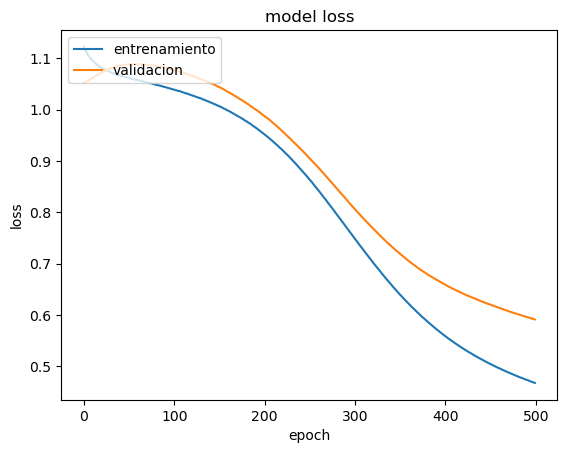

In [9]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['entrenamiento', 'validacion'], loc='upper left')
plt.show()

In [10]:
# Evaluación del modelo
score = model.evaluate(X_train, T_train) 

print('Error :', score[0]) 
print('Accuracy:', score[1])


4/4 [==============================] - 0s 2ms/step - loss: 0.4994 - accuracy: 0.7048
Error : 0.49939700961112976
Accuracy: 0.7047619223594666


In [11]:
# predecir la salida del modelo
Y = model.predict(X_train)

# "invierte" la transformacion binaria para obtener los nombres de las clases
T_str = binarizer.inverse_transform(T_train)
Y_str = binarizer.inverse_transform(Y)

print("%% aciertos : %.3f" % metrics.accuracy_score(T_str, Y_str))
print(Y[:5,:])
print(Y_str[:5])

4/4 [==============================] - 0s 5ms/step
% aciertos : 0.705
[[0.71458656 0.15751623 0.12789719]
 [0.03957672 0.37042162 0.5900017 ]
 [0.8523161  0.07495987 0.07272403]
 [0.896494   0.05209268 0.05141331]
 [0.05294425 0.3742786  0.5727771 ]]
['Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica']


In [12]:
report = metrics.classification_report(T_str, Y_str, target_names=binarizer.classes_)
print("Training metrics:\n%s" % report) 

MM = metrics.confusion_matrix(T_str, Y_str)
print("Confusion matrix:\n%s" % MM)

Training metrics:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        41
Iris-versicolor       1.00      0.03      0.06        32
 Iris-virginica       0.51      1.00      0.67        32

       accuracy                           0.70       105
      macro avg       0.84      0.68      0.58       105
   weighted avg       0.85      0.70      0.61       105

Confusion matrix:
[[41  0  0]
 [ 0  1 31]
 [ 0  0 32]]


In [13]:
# predecir la salida del modelo
Y_test = model.predict(X_test)

# "invierte" la transformacion binaria para obtener los nombres de las clases
T_test_str = binarizer.inverse_transform(T_test)
Y_test_str = binarizer.inverse_transform(Y_test)

print("%% aciertos X_train : %.3f" % metrics.accuracy_score(T_test_str, Y_test_str))

2/2 [==============================] - 0s 2ms/step
% aciertos X_train : 0.644


In [14]:
report = metrics.classification_report(T_test_str, Y_test_str) #, target_names=etiquetas)

print("Métricas de la clasificación:\n%s" % report) 

Métricas de la clasificación:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      0.11      0.20        18
 Iris-virginica       0.53      1.00      0.69        18

       accuracy                           0.64        45
      macro avg       0.84      0.70      0.63        45
   weighted avg       0.81      0.64      0.56        45



In [15]:
MM = metrics.confusion_matrix(T_test_str, Y_test_str)

print("Confusion matrix:\n%s" % MM)
# Convertimos la matriz de confusión en un DataFrame con etiquetas
etiquetas = binarizer.classes_
df_cm = pd.DataFrame(MM, index=etiquetas, columns=etiquetas)

# Mostramos el DataFrame resultante
print("\n\n",df_cm)

Confusion matrix:
[[ 9  0  0]
 [ 0  2 16]
 [ 0  0 18]]


                  Iris-setosa  Iris-versicolor  Iris-virginica
Iris-setosa                9                0               0
Iris-versicolor            0                2              16
Iris-virginica             0                0              18


In [16]:
capaOculta = model.layers[0]
W1, b1 = capaOculta.get_weights()

capaSalida = model.layers[1]
W2,b2 = capaSalida.get_weights()

print("W1")
print(W1)

print("b1")
print(b1)

print("W2")
print(W2)

print("b2")
print(b2)

W1
[[-0.73088306 -0.24132386]
 [ 0.25605908  1.2001842 ]
 [-1.0520061  -1.5339575 ]
 [-0.54596657 -0.14421023]]
b1
[0.7346787  0.03136989]
W2
[[ 0.96118855 -0.53281754 -1.3495966 ]
 [ 1.7768786  -0.9763421  -0.43948516]]
b2
[ 0.41936818 -0.33150193 -0.08786563]


In [17]:
#model.save("IRIS_Sigmoid.h5")